In [1]:
from QuiltLoader import QuiltLoader as ql

# QuiltLoader can handle both 'org/pkg'
data = ql('aics/random_sample')

# or preload
from quilt.data.aics import random_sample
data = ql(random_sample)

# we have subscriptable nodes now
fov = data['fovs'][0]
img = fov['image']
print(img)

TIFF file: 45e6b49cc46daf9daefbf8af011f708e8510e962380803c8a4d600d0817c412c, 301 MiB, little endian, ome, 300 pages


In [2]:
# can pass different load functions in
import tifffile as tfle
loaders = {'image': tfle.imread}

# no org given, defaults to aics
data = ql('random_sample', load_functions=loaders)
fov = data['fovs'][0]
img = fov['image']
print(img.shape)

(75, 4, 624, 924)


In [3]:
# look at those no loads
meta = fov['info']
print(meta.keys())

# you can even do inline opening and continuation
print(fov['info']['cell_segs'][0])

dict_keys(['plate_type', 'plate_id', 'plate_barcode', 'population_id', 'passage', 'clone', 'parent_plate_id', 'image_ids', 'seeding_density', 'cellbatch', 'source_plate_id', 'cell_viability', 'well_type', 'well_name', 'concentration', 'coating_type', 'seed_date', 'colony_ids', 'location', 'content_type', 'instrument', 'channels', 'plates', 'lines', 'wells', 'cell_segs', 'nuclei_segs', 'structure_segs'])
cell_plate_3500000738_well_D6_100X_20170321_1_Scene_10_P10_D0


In [4]:
# iterable nodes too
for i, line in enumerate(data['lines']):
    print(i, line['info']['line'])

0 AICS-10
1 AICS-11
2 AICS-12
3 AICS-13
4 AICS-16
5 AICS-17
6 AICS-23
7 AICS-24
8 AICS-25


In [5]:
# can even slice
for i, well in enumerate(data['wells'][0:6:2]):
    print(i, well)

0 <GroupNode>
image/
info/

1 <GroupNode>
image/
info/

2 <GroupNode>
image/
info/

3 <GroupNode>
image/
info/



In [6]:
associates = fov.get_associates()
print(associates)

{'plates': [<GroupNode>
info/
], 'wells': [<GroupNode>
image/
info/
], 'lines': [<GroupNode>
info/
], 'cell_segs': [<GroupNode>
image/
info/
], 'nuclei_segs': [<GroupNode>
image/
info/
], 'structure_segs': [<GroupNode>
image/
info/
]}


In [7]:
for key, nodes in associates.items():
    print(key, ':', nodes[0]['info'].keys())
    print('-' * 40)

plates : dict_keys(['plate_type', 'plate_id', 'plate_barcode', 'lines', 'wells', 'fovs', 'cell_segs', 'nuclei_segs', 'structure_segs'])
----------------------------------------
wells : dict_keys(['plate_type', 'plate_id', 'plate_barcode', 'population_id', 'passage', 'clone', 'parent_plate_id', 'image_ids', 'seeding_density', 'cellbatch', 'source_plate_id', 'cell_viability', 'well_type', 'well_name', 'concentration', 'coating_type', 'seed_date', 'colony_ids', 'location', 'content_type', 'instrument', 'channels', 'plates', 'lines', 'fovs', 'cell_segs', 'nuclei_segs', 'structure_segs'])
----------------------------------------
lines : dict_keys(['line', 'edits', 'line_id', 'plates', 'wells', 'fovs', 'cell_segs', 'nuclei_segs', 'structure_segs'])
----------------------------------------
cell_segs : dict_keys(['plates', 'lines', 'wells', 'fovs', 'nuclei_segs', 'structure_segs'])
----------------------------------------
nuclei_segs : dict_keys(['plates', 'lines', 'wells', 'fovs', 'cell_segs'

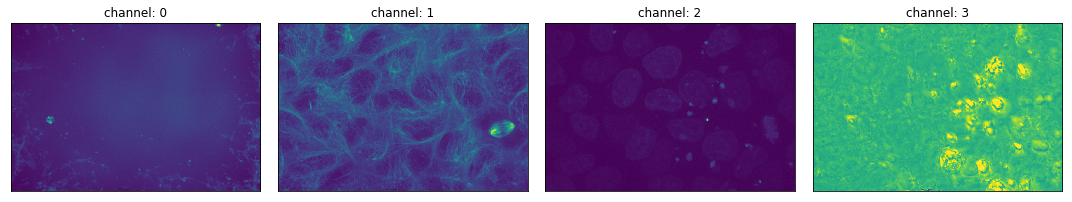

In [8]:
ql.display_channels(img)

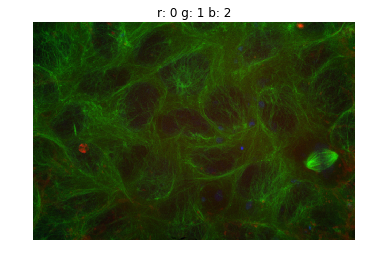

In [9]:
ql.display_rgb(img)

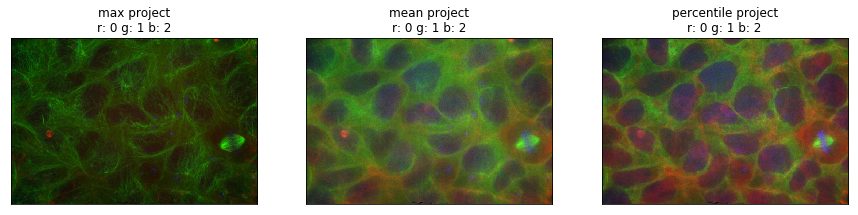

In [10]:
ql.display_rgb(img, use='all')

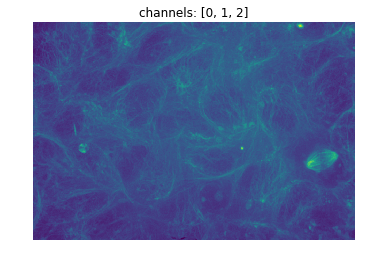

In [11]:
ql.display_stack(img)

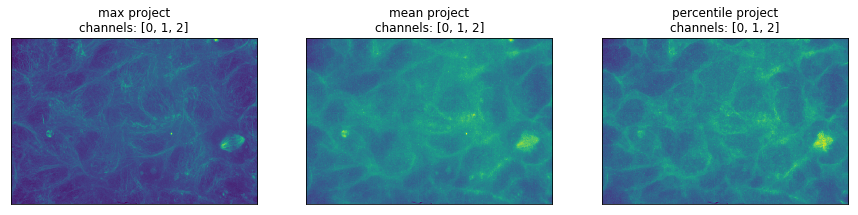

In [12]:
ql.display_stack(img, use='all')

/usr/local/anaconda3/lib/python3.6/site-packages/tifffile/tifffile.py:2642: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


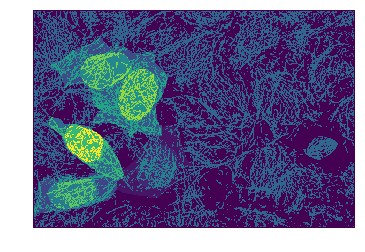

In [13]:
cell_seg = associates['cell_segs'][0]['image']
nuc_seg = associates['nuclei_segs'][0]['image']
struct_seg = associates['structure_segs'][0]['image']
ql.display_icell([cell_seg, nuc_seg, struct_seg])

In [14]:
# there is a bug with this i dont know why but it is time for me to go
# bye bye
# ql.display_icell([cell_seg, nuc_seg, struct_seg], use='all')

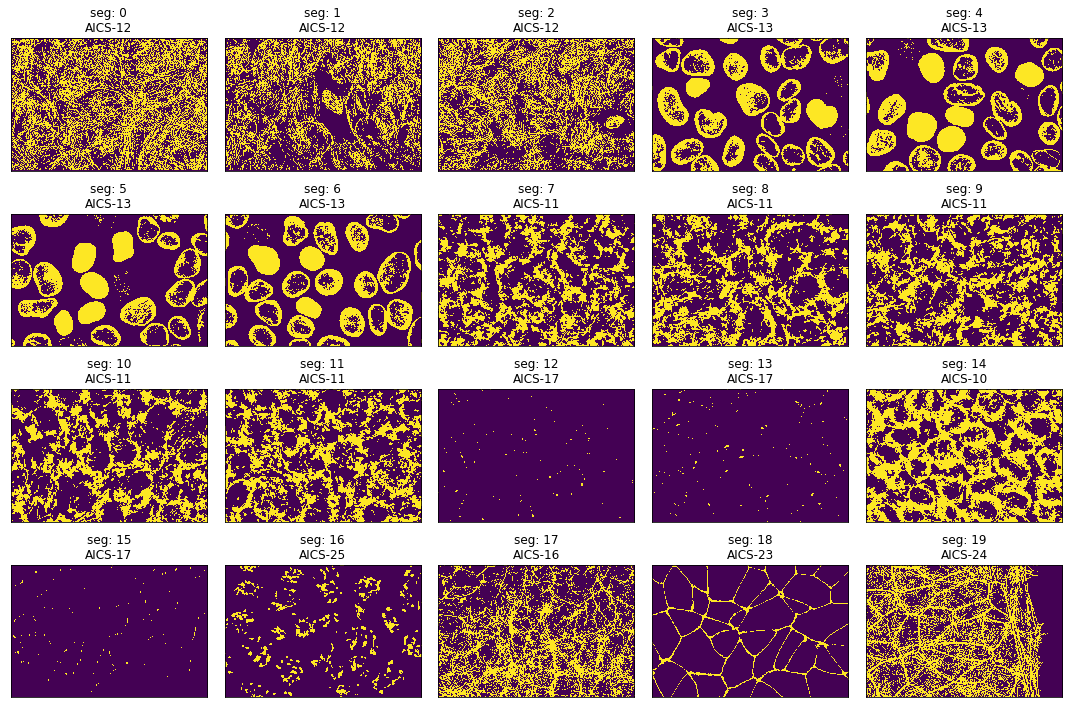

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

n_segs = len(data['structure_segs'])
fig, axes = plt.subplots(int(n_segs / 5), 5, figsize=(15, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    max_project = np.max(data['structure_segs'][i]['image'], 0)
    ax.imshow(max_project)
    ax.set(xticks=[], yticks=[])
    ax.set_title('seg: ' + str(i) + '\n' + data['lines'][data['structure_segs'][i]['info']['lines'][0]]['info']['line'])

plt.tight_layout()